# 1. Regresión

Revisaremos los conceptos de regresión vistos en el teórico.

Haremos pruebas con datos de entrada de **una dimensión**.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Función Verdadera Oculta

Usaremos como función oculta un sinusoide.

In [2]:
#spread=0.25 -> nivel de ruido que quiero tener
#data_size=50 -> cantidad de datos

def create_sinusoidal_data(spread=0.25, data_size=50):
    np.random.seed(0)
    x = np.linspace(0, 1, data_size)
    y = np.sin(2 * np.pi * x) + np.random.normal(scale=spread, size=x.shape)

    return x, y

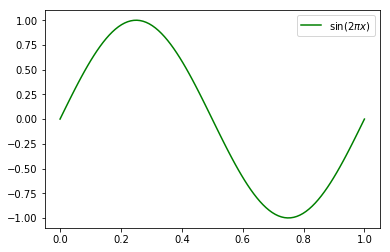

In [3]:
# visualizo los puntos que cree anteriormente
x, f_x = create_sinusoidal_data(0, 100)
plt.plot(x, f_x, color="green", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

## Muestra Ruidosa

Tomaremos puntos uniformes en $x$, ruidosos en $y$.

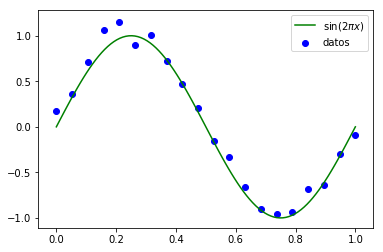

In [4]:
data_size = 20
X, y = create_sinusoidal_data(0.10, data_size)

plt.scatter(X, y, color="blue", label="datos")
plt.plot(x, f_x, color="green", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

## División en Entrenamiento y Evaluación

Dividiremos aleatoriamente los datos en una parte para entrenamiento y otra para evaluación.

Usaremos 
[train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) de scikit-learn, que me permite hacer divisiones aletorizadas del conjunto de datos.

In [5]:
import sklearn
sklearn.__version__

'0.23.1'

In [6]:
# X e Y son vectores de 20 elementos cada uno.

from sklearn.model_selection import train_test_split
train_size = 5 # tomo 5 puntos para Train
test_size = data_size - train_size # y dejo los otros 15 para Test

# random_state=0 -> fijo la semilla aleatoria para que la división sea siempre repetible
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=0)

In [7]:
# vectores de entrenamiento (5 elementos) y de test (15 elementos)
X_train.shape, X_test.shape

((5,), (15,))

In [8]:
X_train

array([0.57894737, 0.15789474, 0.        , 0.78947368, 0.63157895])

In [9]:
y_train

array([-0.33052004,  1.0612558 ,  0.17640523, -0.93603283, -0.65962014])

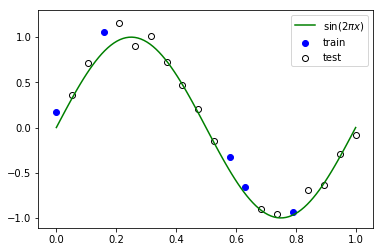

In [10]:
plt.scatter(X_train, y_train, color="blue", label="train")
plt.scatter(X_test, y_test, color="white", edgecolor="k", label="test")
plt.plot(x, f_x, color="green", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

## Regresión Lineal

Probaremos ajustar los puntos usando una recta.

Vamos a programar a mano el aprendizaje y la predicción.

### Solución de Cuadrados Mínimos

Datos de entrenamiento:
- $X \in R^{N \times K}:$ $N$ vectores de entrada, de $K$ dimensiones cada uno.
- $y \in R^N:$ $N$ valores de salida.

Aprendizaje:

$$w^* = (X^\top X)^{-1} X^\top y$$

Predicción:

$$f_{w^*}(x) = x^\top w^* = \sum_{k=1}^K x_k w^*_k$$

Con $K=1$ tendríamos:

$$f_{w^*}(x) = x_1 w_1^*$$

Para que sea una recta nos falta un $w_0$ ("bias, ó sesgo").
Esto se puede resolver haciendo $K=2$ y agregando un valor constante 1 a cada dato:

$$f_{w^*}((1, x)) = w_0 + x_1 w_1^*$$


In [11]:
X_train

array([0.57894737, 0.15789474, 0.        , 0.78947368, 0.63157895])

In [12]:
# VECTOR DE BIAS = W
# agrego a mano un vector de 1 que funcione como sesgo (bias)
X_train_bias=np.stack((X_train, np.ones(X_train.shape[0])), axis=1) # agrego el bias
X_train_bias

array([[0.57894737, 1.        ],
       [0.15789474, 1.        ],
       [0.        , 1.        ],
       [0.78947368, 1.        ],
       [0.63157895, 1.        ]])

In [13]:
def linear_least_squares(X, y):
    X_b = np.stack((X, np.ones(X.shape[0])), axis=1)  # add bias
    return np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T.dot(y))

def f(X, w):
    X_b = np.stack((X, np.ones(X.shape[0])), axis=1)  # add bias: (1, x)
    return X_b.dot(w)

### Entrenar

In [14]:
X_train, y_train

(array([0.57894737, 0.15789474, 0.        , 0.78947368, 0.63157895]),
 array([-0.33052004,  1.0612558 ,  0.17640523, -0.93603283, -0.65962014]))

In [15]:
w = linear_least_squares(X_train, y_train)

In [16]:
w  # una recta! -> OBTENGO DOS VALORES W0 Y W1

array([-1.95626346,  0.70657973])

### Graficar

Graficaremos la función aprendida a partir de los datos de entrenamiento. También graficaremos con los datos de evaluación y la función oculta, para comparar.

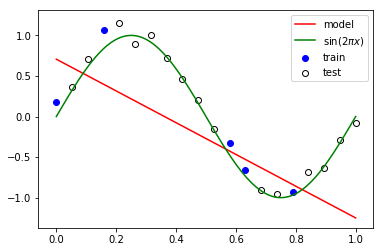

In [17]:
plt.scatter(X_train, y_train, color="blue", label="train")
plt.scatter(X_test, y_test, color="white", edgecolor="k", label="test")
plt.plot(x, f(x, w), color="red", label="model")
plt.plot(x, f_x, color="green", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

### Predecir y Evaluar: Error Cuadrático Medio

Obtendremos los valores predichos para los datos de entrenamiento y de evaluación.
Calcularemos el error cuadrático medio sobre ambos conjuntos de datos.

In [18]:
y_train_pred = f(X_train, w)
y_test_pred = f(X_test, w)

Usamos la función [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) de scikit-learn:

In [19]:
from sklearn.metrics import mean_squared_error

train_error = mean_squared_error(y_train, y_train_pred) #(valor de referencia, valor predicho)
test_error = mean_squared_error(y_test, y_test_pred) #(valor de referencia, valor predicho)
print(f'Train error: {train_error:0.2}')
print(f'Test error: {test_error:0.2}')

Train error: 0.15
Test error: 0.38


## Regresión Polinomial

Ahora haremos regresión polinomial. En este caso usaremos scikit-learn para definir el modelo, entrenar y predecir.

En scikit-learn cada dato de entrada debe ser un vector, no un número. Debemos convertir cada dato en un vector de una dimensión:

In [20]:
X_train.shape, X_test.shape

((5,), (15,))

In [21]:
# con reshape transformo para que lo pueda leer bien sklearn
# paso los vectores a matrices con reshape
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
X_train.shape, X_test.shape

((5, 1), (15, 1))

### Instanciar y Entrenar

En scikit-learn, la regresión polinomial se implementa como un modelo de dos pasos (ver [Polynomial interpolation](https://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html)).

Crearemos y entrenaremos un modelo de grado 2.

Como siempre en scikit-learn, para entrenar usamos la función **fit**.

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree = 2 #seteo los grados del polinomio que quiero probar
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

In [23]:
# para entrenar el modelo uso la funcion fit
model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [24]:
pf = PolynomialFeatures(degree)
pf.fit(X_train, y_train)

PolynomialFeatures()

### Graficar Resultado

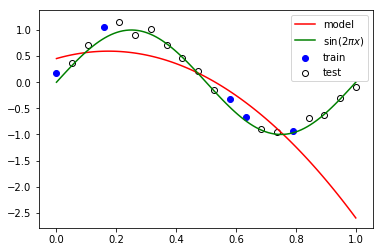

In [26]:
plt.scatter(X_train, y_train, color="blue", label="train")
plt.scatter(X_test, y_test, color="white", edgecolor="k", label="test")
plt.plot(x, model.predict(x.reshape(-1, 1)), color="red", label="model")
plt.plot(x, f_x, color="green", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

### Predecir y Evaluar

Para predecir, usamos la función **predict**:

In [27]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [28]:
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)
print(f'Train error: {train_error:0.2}')
print(f'Test error: {test_error:0.2}') # el error aumenta un monton,
# porque una parabola no es la mejor forma que explica estos datos

Train error: 0.091
Test error: 0.87


## Sobreajuste vs. Generalización

Probaremos polinomios de varios grados, obteniendo valores de error en entrenamiento y evaluación:

In [29]:
train_errors = []
test_errors = []
degrees = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for degree in degrees:
    # train:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

Graficaremos las curvas de error en términos del grado del polinomio.

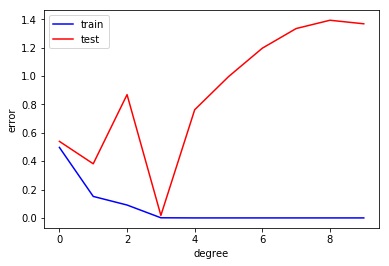

In [30]:
plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, test_errors, color="red", label="test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

Se puede ver que el error en entrenamiento siempre baja, pero que en algún punto comienza el sobreajuste, ya que el error en evaluación empieza a subir.

### Mejor Modelo

De acuerdo a la gráfica anterior, y como era de esperarse, el modelo que mejor ajusta los datos es el de grado 3:

In [31]:
degree = 3
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train, y_train);

Graficamos:

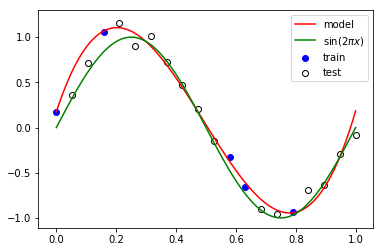

In [32]:
plt.scatter(X_train, y_train, color="blue", label="train")
plt.scatter(X_test, y_test, color="white", edgecolor="k", label="test")
plt.plot(x, model.predict(x.reshape(-1, 1)), color="red", label="model")
plt.plot(x, f_x, color="green", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

### Modelo Sobreajustado

Veamos cómo es la gráfica de uno de los modelos que sufre de sobreajuste:

In [33]:
degree = 8
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train, y_train);

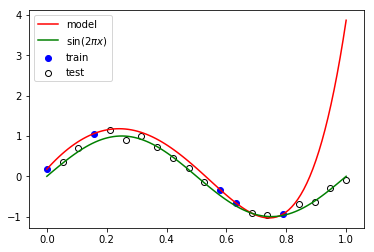

In [34]:
plt.scatter(X_train, y_train, color="blue", label="train")
plt.scatter(X_test, y_test, color="white", edgecolor="k", label="test")
plt.plot(x, model.predict(x.reshape(-1, 1)), color="red", label="model")
plt.plot(x, f_x, color="green", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

## Ejercicios

1. Probar agregando puntos a los datos de entrenamiento para prevenir el sobreajuste en polinomios de grado alto.
2. Probar usando regularización para prevenir el sobreajuste en polinomios de grado alto
(ver [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)).

## Referencias

Scikit-learn:

- [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
- [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)
- [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)
- [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
